In [9]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

file_path = 'assessment_da25.csv'
data = pd.read_csv(file_path)

data.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [3]:
variant_counts = data['Variant'].value_counts()
variant_counts

Variant
A    1000
B    1000
Name: count, dtype: int64

In [4]:
# Splitting the data into two groups based on the variant
group_a = data[data['Variant'] == 'A']
group_b = data[data['Variant'] == 'B']

# Calculating descriptive statistics for each group
desc_stats_a = group_a.describe()
desc_stats_b = group_b.describe()

# Comparing the means between the two groups
mean_comparison = pd.DataFrame({
    'Metric': desc_stats_a.columns,
    'Mean - A': desc_stats_a.loc['mean'].values,
    'Mean - B': desc_stats_b.loc['mean'].values,
    'Difference (B-A)': desc_stats_b.loc['mean'].values - desc_stats_a.loc['mean'].values
})

mean_comparison

,Metric,Mean - A,Mean - B,Difference (B-A)
0,Number of page views,4.98500,5.31700,0.33200
1,GMV (in $),7.68999,9.28953,1.59954
2,Number of add to cart,1.88400,2.46900,0.58500
3,Clicks on media,1.49500,1.32400,-0.17100
4,Time on Page (sec),20.54300,20.04700,-0.49600
5,user_id,499.50000,1499.50000,1000.00000


In [8]:
metrics = ['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']

t_test_results = {}

# Loop through each metric and perform a t-test
for metric in metrics:
    stat, p_value = ttest_ind(group_a[metric], group_b[metric], equal_var=False)  # Assuming unequal variances
    # Adjusting for representation of very small p-values
    if p_value < 0.000001:
        p_value_formatted = '{:.6e}'.format(p_value)
    else:
        p_value_formatted = round(p_value, 6)
    t_test_results[metric] = {'t-statistic': round(stat, 6), 'p-value': p_value_formatted}

# Converting the corrected results to a dataframe for better readability
t_test_results_df = pd.DataFrame(t_test_results).T

t_test_results_df

,t-statistic,p-value
Number of page views,-3.188165,0.001454
GMV (in $),-1.283954,0.199308
Number of add to cart,-8.777389,3.668899e-18
Clicks on media,3.17107,0.001542
Time on Page (sec),0.55543,0.578663


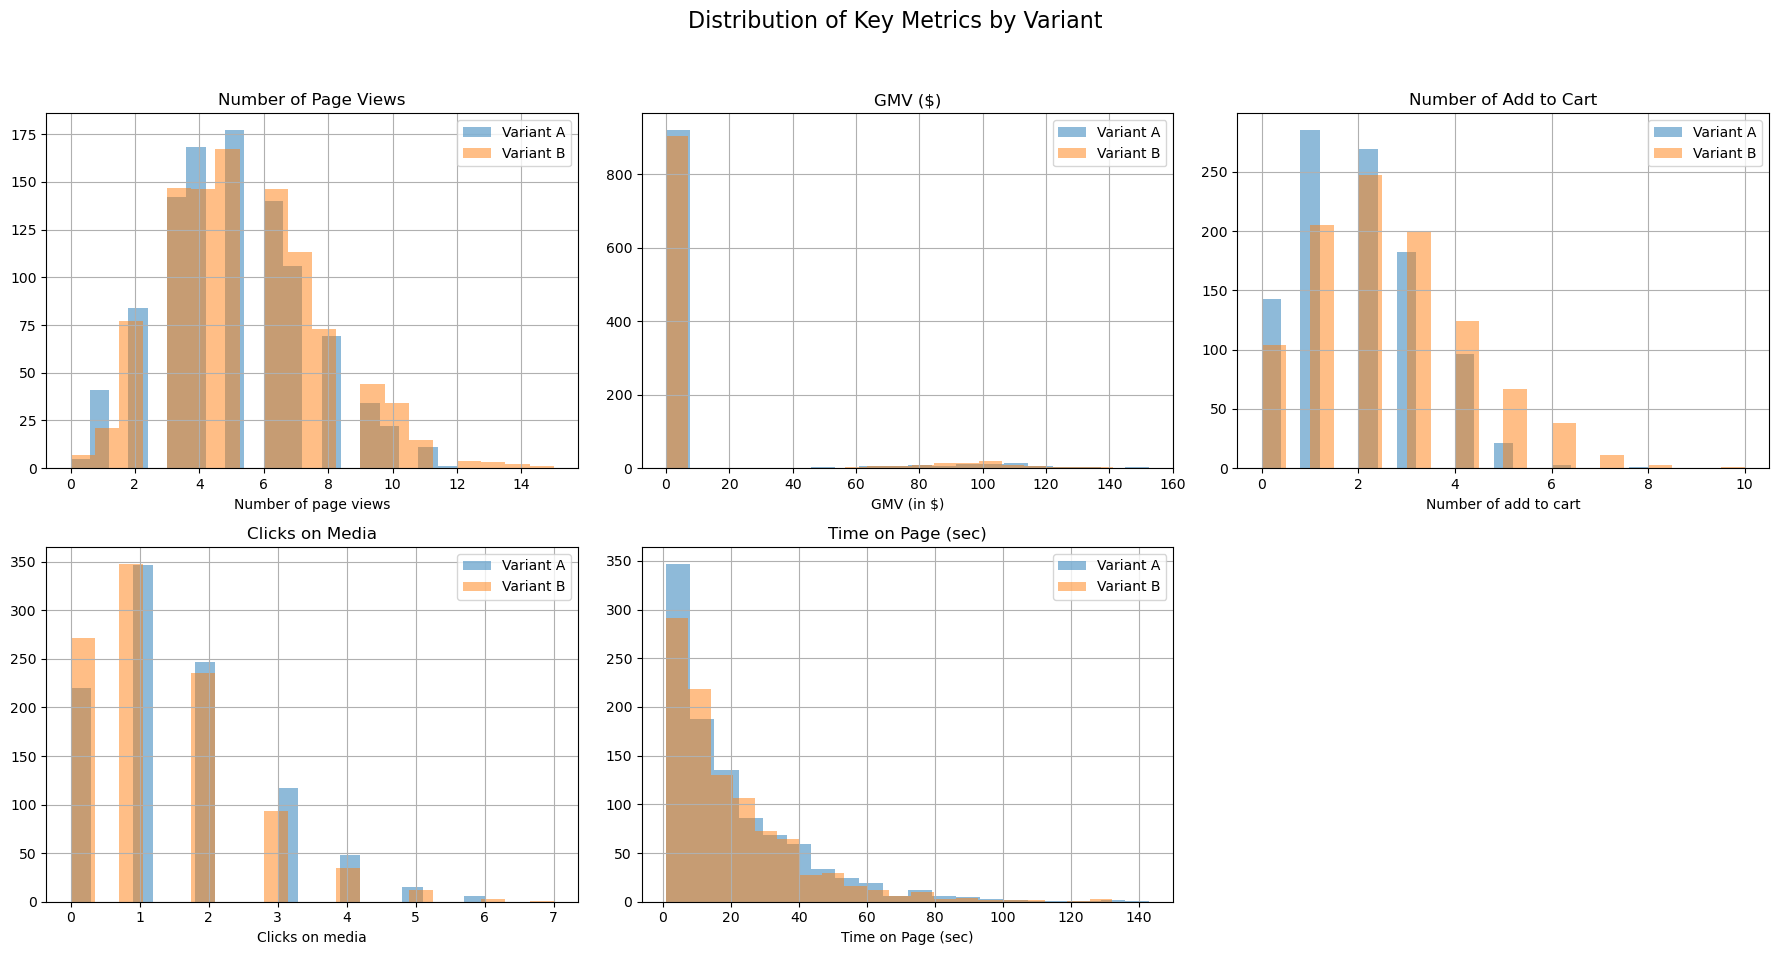

In [10]:
# Creating histograms for key metrics to visually compare the distribution between Variant A and B

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Key Metrics by Variant', fontsize=16)

# Defining the metrics and titles for plotting
metrics_to_plot = ['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']
titles = ['Number of Page Views', 'GMV ($)', 'Number of Add to Cart', 'Clicks on Media', 'Time on Page (sec)']

# Loop through each metric and create a histogram
for ax, metric, title in zip(axes.flatten(), metrics_to_plot, titles):
    group_a[metric].hist(ax=ax, alpha=0.5, label='Variant A', bins=20)
    group_b[metric].hist(ax=ax, alpha=0.5, label='Variant B', bins=20)
    ax.set_title(title)
    ax.set_xlabel(metric)
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Remove empty subplot (if any)
if len(metrics) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()